In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

from IPython.display import Image, display

%matplotlib inline

In [3]:
bb1_pactive = pd.read_csv('../data_preparation/output/bb1_pactive.csv')
bb2_pactive = pd.read_csv('../data_preparation/output/bb2_pactive.csv')
bb3_pactive = pd.read_csv('../data_preparation/output/bb3_pactive.csv')

total = pd.read_csv('../data_preparation/output/total_compounds.csv')
actives = total.loc[total['read_count'] > 0]
inactives = total.loc[total['read_count'] == 0]

### Visualize distribution of P(active) values for each building block position

Analysis adapted from: `paper_scripts/1_analysis_at_fragment_level_bb3.ipynb`

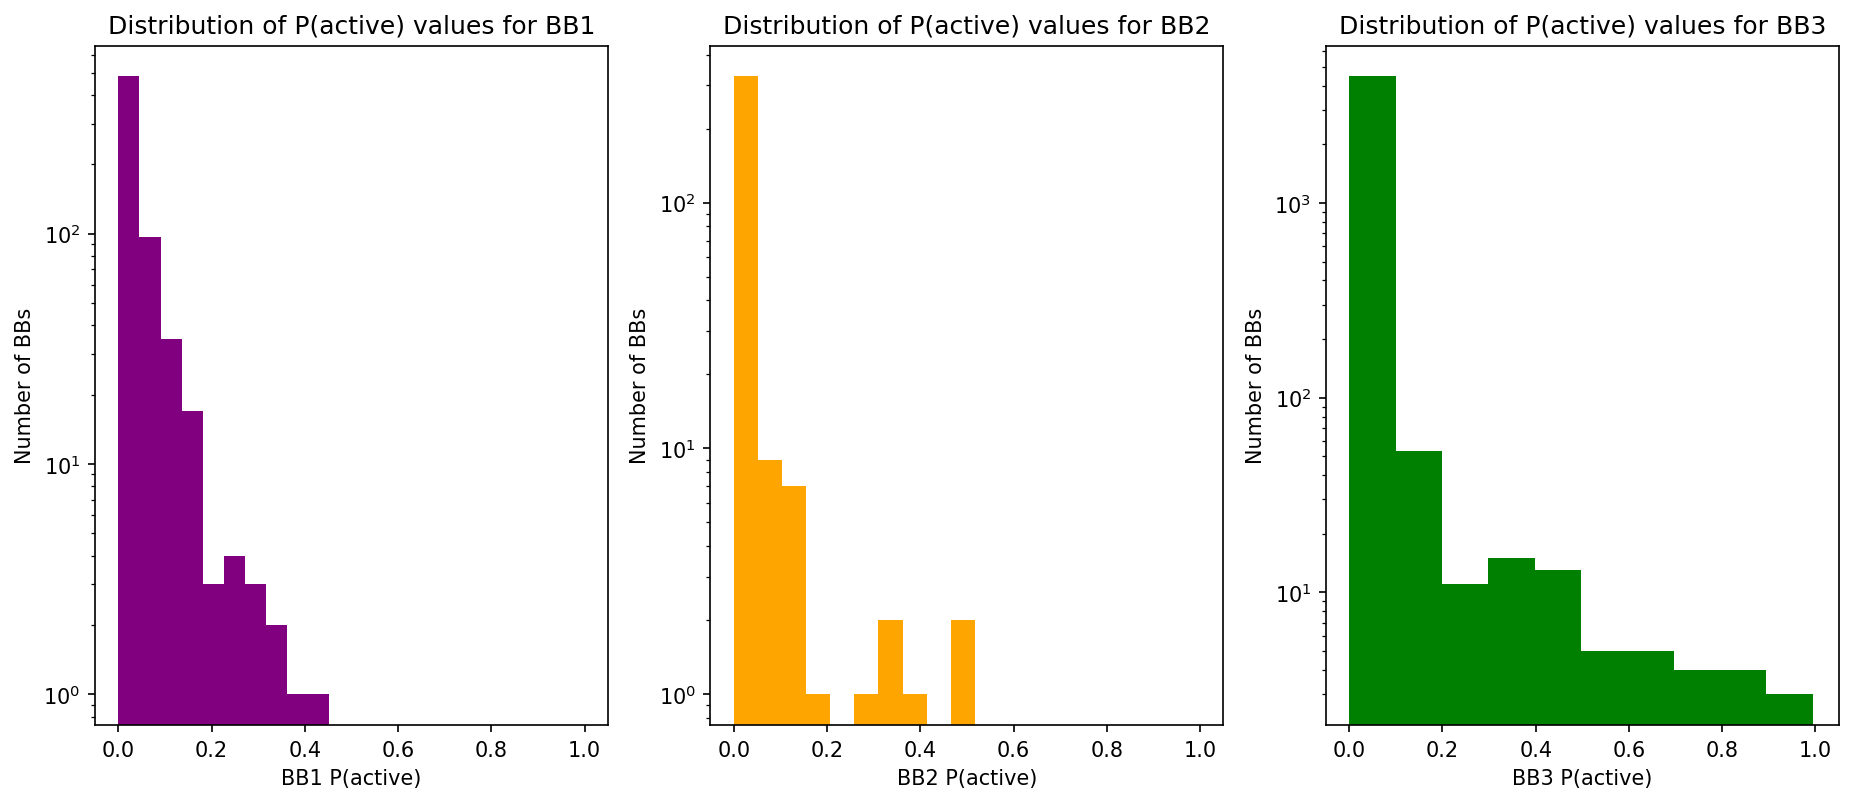

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15,6), dpi=150)
axs[0].hist(bb1_pactive['P(active)'], color='purple', log=True)
axs[0].set_xlim([-0.05, 1.05])
axs[0].set_xlabel('BB1 P(active)')
axs[0].set_ylabel('Number of BBs')
axs[0].set_title('Distribution of P(active) values for BB1')

axs[1].hist(bb2_pactive['P(active)'], color='orange', log=True)
axs[1].set_xlim([-0.05, 1.05])
axs[1].set_xlabel('BB2 P(active)')
axs[1].set_ylabel('Number of BBs')
axs[1].set_title('Distribution of P(active) values for BB2')

axs[2].hist(bb3_pactive['P(active)'], color='green', log=True)
axs[2].set_xlim([-0.05, 1.05])
axs[2].set_xlabel('BB3 P(active)')
axs[2].set_ylabel('Number of BBs')
axs[2].set_title('Distribution of P(active) values for BB3')

plt.savefig('figures/bb_pactive_dist.png')
plt.show()

### Visualize top most enriched building blocks at each position


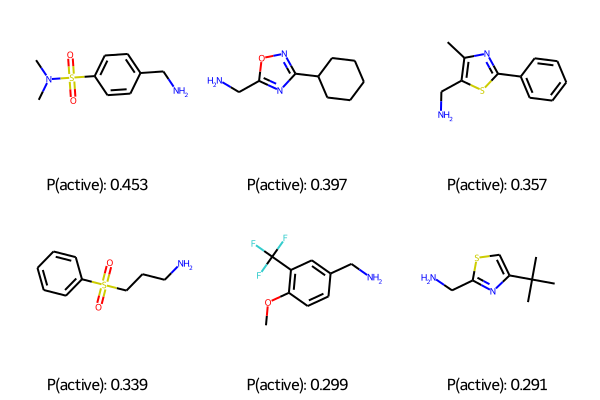

In [5]:
bb1_sorted = bb1_pactive.sort_values(by='P(active)', ascending=False)
bb1_top = bb1_sorted[:6]
bb1_mols = [Chem.MolFromSmiles(smi) for smi in bb1_top['stereo_SMILES']]
img = Draw.MolsToGridImage(bb1_mols, molsPerRow=3, returnPNG=False,
                           legends=[f'P(active): {x:.3f}' for x in bb1_top['P(active)']])
display(img)
img.save('figures/bb1_top_bbs.png')

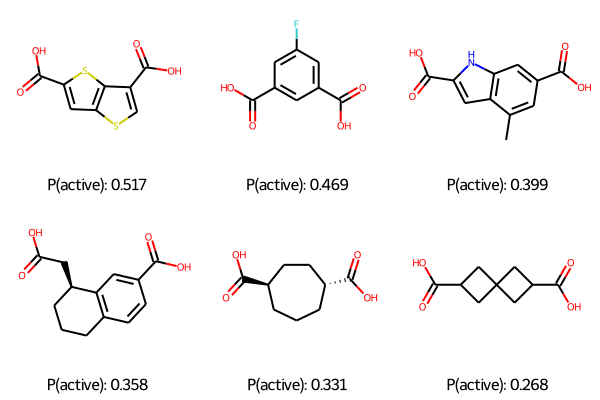

In [6]:
bb2_sorted = bb2_pactive.sort_values(by='P(active)', ascending=False)
bb2_top = bb2_sorted[:6]
bb2_mols = [Chem.MolFromSmiles(smi) for smi in bb2_top['stereo_SMILES']]
img = Draw.MolsToGridImage(bb2_mols, molsPerRow=3, returnPNG=False,
                           legends=[f'P(active): {x:.3f}' for x in bb2_top['P(active)']])
display(img)
img.save('figures/bb2_top_bbs.png')

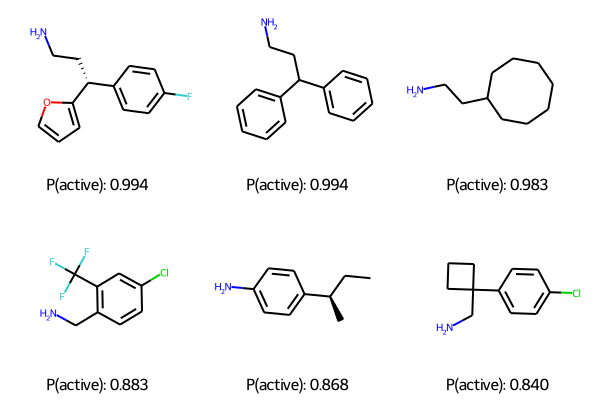

In [7]:
bb3_sorted = bb3_pactive.sort_values(by='P(active)', ascending=False)
bb3_top = bb3_sorted[:6]
bb3_mols = [Chem.MolFromSmiles(smi) for smi in bb3_top['stereo_SMILES']]
img = Draw.MolsToGridImage(bb3_mols, molsPerRow=3, returnPNG=False,
                     legends=[f'P(active): {x:.3f}' for x in bb3_top['P(active)']])
display(img)
img.save('figures/bb3_top_bbs.png')

### Visualize pairwise trends in building block positions

Analysis adapted from: `paper_scripts/3_diversity_of_other_positions.ipynb`

In [8]:
# Get list of building blocks at each position with P(active) greater than 0
bb1_active = bb1_pactive.loc[bb1_pactive['P(active)'] > 0]
bb2_active = bb2_pactive.loc[bb2_pactive['P(active)'] > 0]
bb3_active = bb3_pactive.loc[bb3_pactive['P(active)'] > 0]

pos_3_bb1_unique = np.zeros(len(bb3_active))
pos_3_bb2_unique = np.zeros(len(bb3_active))
for index, bb in enumerate(bb3_active['SMILES']):
    pos_3_bb1_unique[index] = len(set(actives.loc[actives['bb3'] == bb]['bb1']))
    pos_3_bb2_unique[index] = len(set(actives.loc[actives['bb3'] == bb]['bb2']))

pos_2_bb1_unique = np.zeros(len(bb2_active))
pos_2_bb3_unique = np.zeros(len(bb2_active))
for index, bb in enumerate(bb2_active['SMILES']):
    pos_2_bb1_unique[index] = len(set(actives.loc[actives['bb2'] == bb]['bb1']))
    pos_2_bb3_unique[index] = len(set(actives.loc[actives['bb2'] == bb]['bb3']))
    
pos_1_bb2_unique = np.zeros(len(bb1_active))
pos_1_bb3_unique = np.zeros(len(bb1_active))
for index, bb in enumerate(bb1_active['SMILES']):
    pos_1_bb2_unique[index] = len(set(actives.loc[actives['bb1'] == bb]['bb2']))
    pos_1_bb3_unique[index] = len(set(actives.loc[actives['bb1'] == bb]['bb3']))

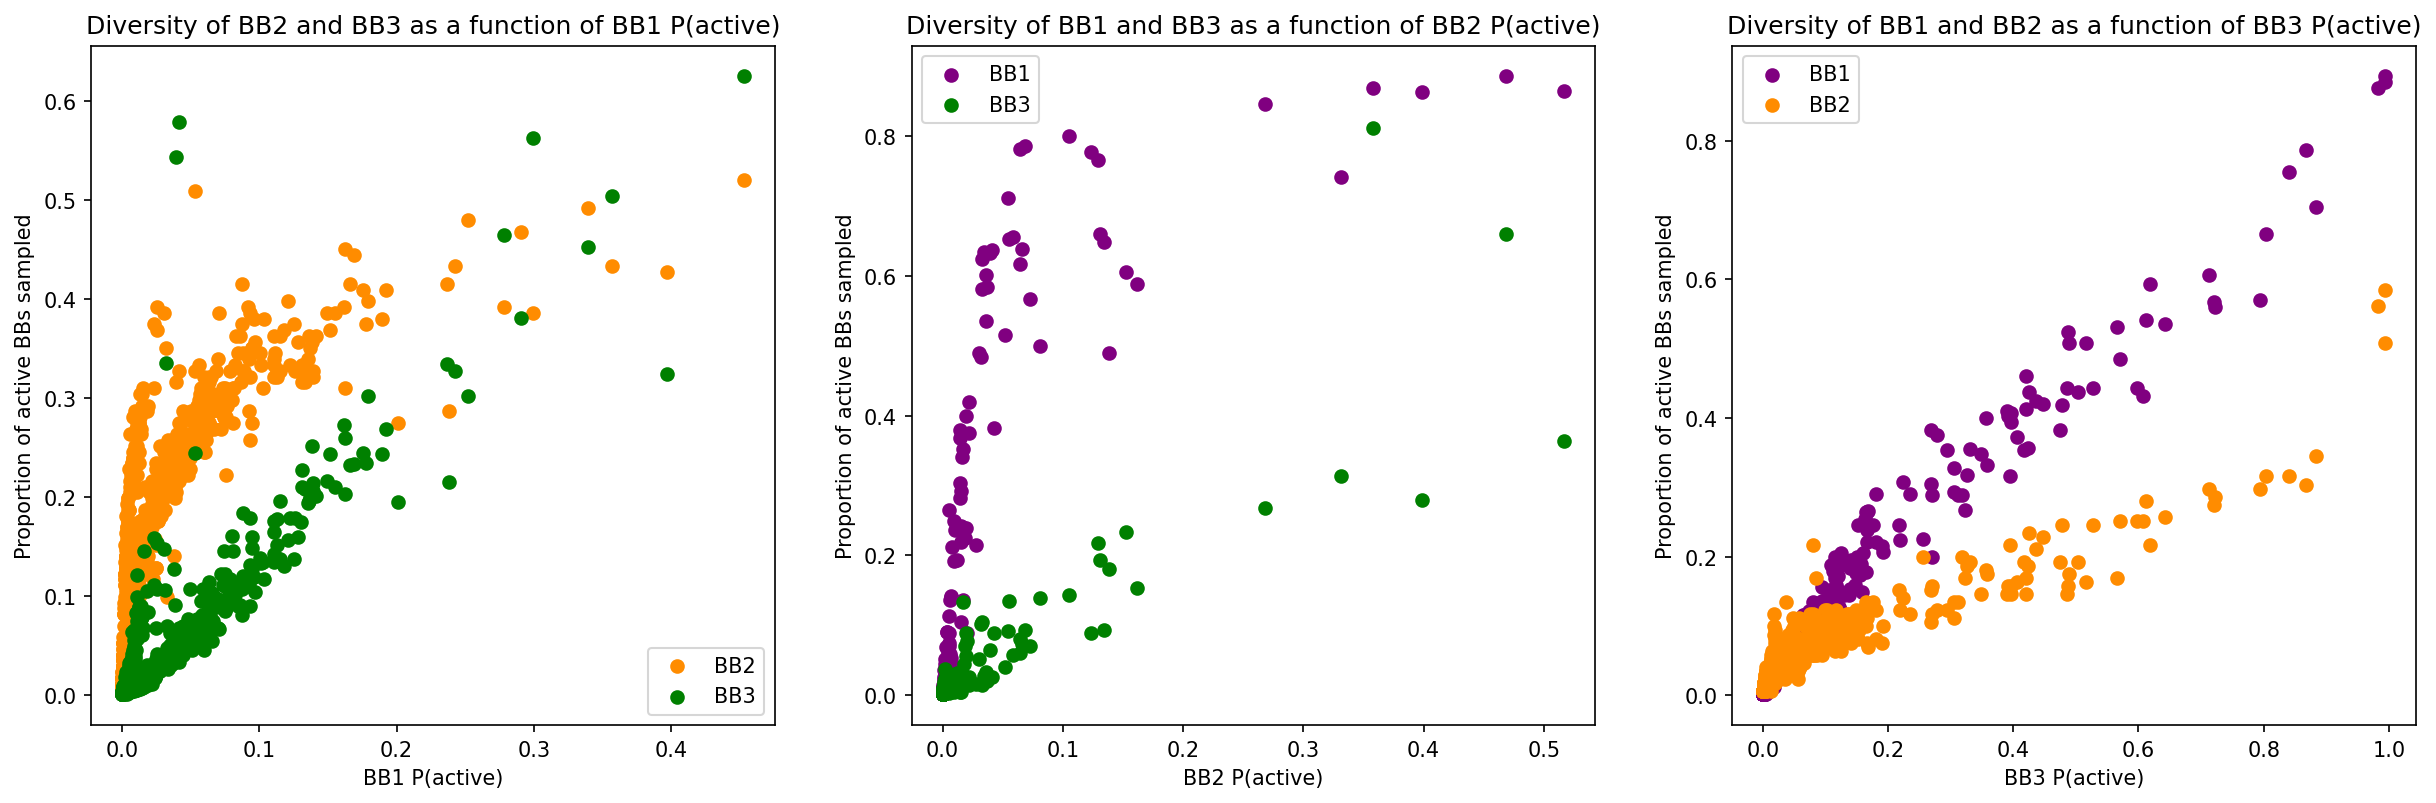

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), dpi=150)

axs[2].scatter(bb3_active['P(active)'], pos_3_bb1_unique/len(bb1_active), label='BB1', color='purple')
axs[2].scatter(bb3_active['P(active)'], pos_3_bb2_unique/len(bb2_active), label='BB2', color='darkorange')
axs[2].set_xlabel('BB3 P(active)')
axs[2].set_ylabel('Proportion of active BBs sampled')
axs[2].set_title('Diversity of BB1 and BB2 as a function of BB3 P(active)')
axs[2].legend(loc='best')

axs[1].scatter(bb2_active['P(active)'], pos_2_bb1_unique/len(bb1_active), label='BB1', color='purple')
axs[1].scatter(bb2_active['P(active)'], pos_2_bb3_unique/len(bb3_active), label='BB3', color='green')
axs[1].set_xlabel('BB2 P(active)')
axs[1].set_ylabel('Proportion of active BBs sampled')
axs[1].set_title('Diversity of BB1 and BB3 as a function of BB2 P(active)')
axs[1].legend(loc='best')

axs[0].scatter(bb1_active['P(active)'], pos_1_bb2_unique/len(bb2_active), label='BB2', color='darkorange')
axs[0].scatter(bb1_active['P(active)'], pos_1_bb3_unique/len(bb3_active), label='BB3', color='green')
axs[0].set_xlabel('BB1 P(active)')
axs[0].set_ylabel('Proportion of active BBs sampled')
axs[0].set_title('Diversity of BB2 and BB3 as a function of BB1 P(active)')
axs[0].legend(loc='best')

plt.savefig('figures/bb_pactive_to_diversity.png')
plt.show()

### Visualize density of active compounds in 2D bins
Analysis adapted from: `paper_scripts/3D_barplot.ipynb`

In [10]:
# Merge P(active) of each BB into the df of total compounds
total_complete = pd.merge(total, bb1_pactive, left_on='bb1', right_on='SMILES').drop(columns=['SMILES', 'stereo_SMILES'])\
    .rename(columns={'P(active)': 'P(active)_1'})\
    .merge(bb2_pactive, left_on='bb2', right_on='SMILES').drop(columns=['SMILES', 'stereo_SMILES'])\
    .rename(columns={'P(active)': 'P(active)_2'})\
    .merge(bb3_pactive, left_on='bb3', right_on='SMILES').drop(columns=['SMILES', 'stereo_SMILES'])\
    .rename(columns={'P(active)': 'P(active)_3'})


In [11]:
# Separate activity at each building block position into equally spaced bins
labels = np.arange(0, 5)
bb1_bins = np.linspace(np.min(total_complete['P(active)_1']), np.max(total_complete['P(active)_1']), 6)
bb2_bins = np.linspace(np.min(total_complete['P(active)_2']), np.max(total_complete['P(active)_2']), 6)
bb3_bins = np.linspace(np.min(total_complete['P(active)_3']), np.max(total_complete['P(active)_3']), 6)

bb1_bins_labels = [f'({bb1_bins[i]:.2f}, {bb1_bins[i+1]:.2f}]' for i in range(len(bb1_bins)-1)]
bb2_bins_labels = [f'({bb2_bins[i]:.2f}, {bb2_bins[i+1]:.2f}]' for i in range(len(bb2_bins)-1)]
bb3_bins_labels = [f'({bb3_bins[i]:.2f}, {bb3_bins[i+1]:.2f}]' for i in range(len(bb3_bins)-1)]

total_complete['bb1_bin'] = pd.cut(total_complete['P(active)_1'], bb1_bins, labels=labels).fillna(0)
total_complete['bb2_bin'] = pd.cut(total_complete['P(active)_2'], bb2_bins, labels=labels).fillna(0)
total_complete['bb3_bin'] = pd.cut(total_complete['P(active)_3'], bb3_bins, labels=labels).fillna(0)

#### Group by positions 1 and 2

In [12]:
# Calculate how many active and inactive compounds are in each 2D bin
inactive_sum_1_2 = total_complete.loc[total_complete['read_count'] == 0].groupby(['bb1_bin', 'bb2_bin'], as_index=False).count()
inactive_sum_1_2 = inactive_sum_1_2.rename(columns={'bb3_bin': 'bb3_bin_inactive'})
active_sum_1_2 = total_complete.loc[total_complete['read_count'] > 0].groupby(['bb1_bin', 'bb2_bin'], as_index=False).count()
active_sum_1_2 = active_sum_1_2.rename(columns={'bb3_bin': 'bb3_bin_active'})


In [13]:
# Calculate relative ratio of active and inactive compounds in each 2D bin
total_sum_1_2 = pd.merge(inactive_sum_1_2[['bb1_bin', 'bb2_bin', 'bb3_bin_inactive']], 
         active_sum_1_2[['bb1_bin', 'bb2_bin', 'bb3_bin_active']], 
         left_on=['bb1_bin', 'bb2_bin'], right_on=['bb1_bin', 'bb2_bin'])
total_sum_1_2['active_rate'] = np.nan_to_num(total_sum_1_2['bb3_bin_active']/(total_sum_1_2['bb3_bin_active'] + total_sum_1_2['bb3_bin_inactive']), 0)
total_sum_1_2['log_counts'] = np.nan_to_num(np.log10(total_sum_1_2['bb3_bin_active'] + total_sum_1_2['bb3_bin_inactive']))

In [14]:
# Initialize parameters for plot
lx_1_2 = len(np.unique(total_sum_1_2['bb1_bin']))
ly_1_2 = len(np.unique(total_sum_1_2['bb2_bin']))
xpos_1_2 = np.arange(lx_1_2-1, -1, -1)
ypos_1_2 = np.arange(0, ly_1_2, 1)
xpos_1_2, ypos_1_2 = np.meshgrid(xpos_1_2 + 0.35, ypos_1_2 + 0.25)
xpos_1_2 = xpos_1_2.flatten()
ypos_1_2 = ypos_1_2.flatten()
zpos_1_2 = np.zeros(lx_1_2*ly_1_2)

dx_1_2 = 0.25*np.ones_like(zpos_1_2)
dy_1_2 = dx_1_2.copy()
dz_1_2 = total_sum_1_2.sort_values(by=['bb1_bin', 'bb2_bin'])['log_counts']


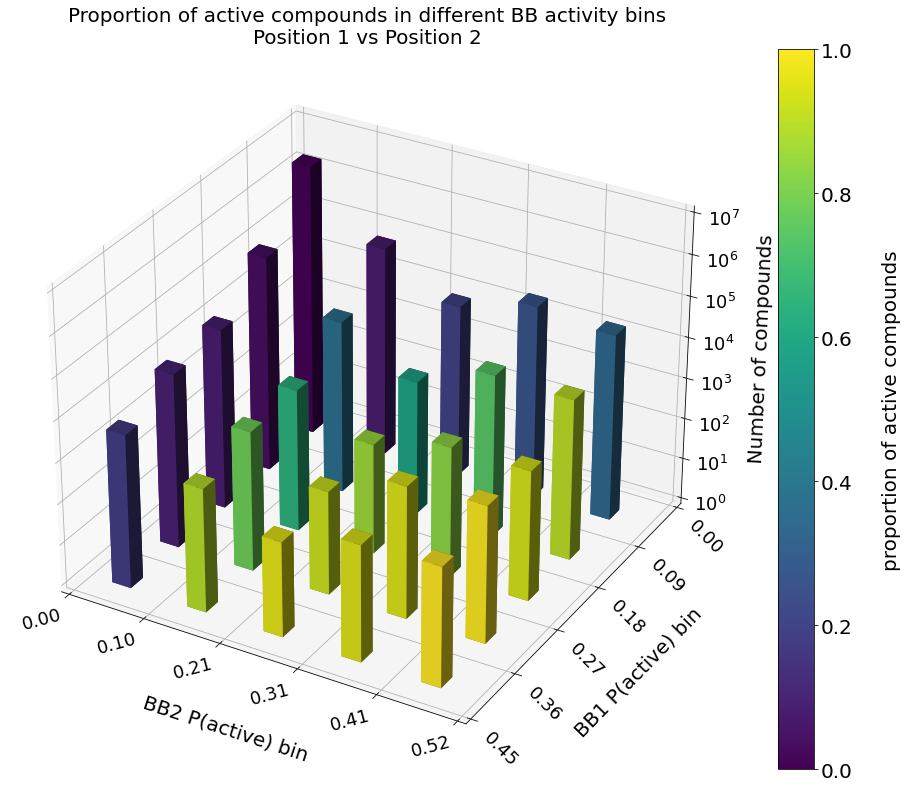

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,10))
# Adds 3D axes object to figure
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

color = plt.cm.viridis(total_sum_1_2['active_rate'])
cp_1_2 = ax.bar3d(xpos_1_2[::-1], ypos_1_2[::-1], zpos_1_2, dx_1_2, dy_1_2, dz_1_2, color=color)
#ax.set_xticks(np.arange(5, -1, -1))
ax.set_xticks(np.arange(0, 6))
ax.set_xticklabels([f'{x:.2f}' for x in bb2_bins], fontsize=18, rotation=15, ha='right')
ax.tick_params(axis='x', pad=0)

#ax.set_yticks(np.arange(0, 6))
ax.set_yticks(np.arange(5, -1, -1))
ax.set_yticklabels([f'{x:.2f}' for x in bb1_bins], fontsize=18, rotation=-45, ha='left')
ax.tick_params(axis='y', pad=0)

ax.set_zticks(np.arange(0, 8, 1))
ax.set_zticklabels([f'$10^{x}$' for x in np.arange(0,8,1)], fontsize=18)
ax.tick_params(axis='z', pad=10)

ax.set_xlabel('BB2 P(active) bin', fontsize=20, labelpad=30)
ax.set_ylabel('BB1 P(active) bin', fontsize=20, labelpad=35)
ax.set_zlabel('Number of compounds', fontsize=20, labelpad=25, rotation=5)
ax.set_title('Proportion of active compounds in different BB activity bins\nPosition 1 vs Position 2', fontsize=20)
cbar_1_2 = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, fraction=0.046)
cbar_1_2.ax.tick_params(labelsize=20)
cbar_1_2.set_label('proportion of active compounds', fontsize=20, labelpad=30)
plt.savefig('figures/bb_1_2_3D.png', bbox_inches='tight')
#plt.show()

#### Group by positions 1 and 3

In [26]:
# Calculate how many active and inactive compounds are in each 2D bin
inactive_sum_1_3 = total_complete.loc[total_complete['read_count'] == 0].groupby(['bb1_bin', 'bb3_bin'], as_index=False).count()
inactive_sum_1_3 = inactive_sum_1_3.rename(columns={'bb2_bin': 'bb2_bin_inactive'})
active_sum_1_3 = total_complete.loc[total_complete['read_count'] > 0].groupby(['bb1_bin', 'bb3_bin'], as_index=False).count()
active_sum_1_3 = active_sum_1_3.rename(columns={'bb2_bin': 'bb2_bin_active'})


In [27]:
# Calculate relative ratio of active and inactive compounds in each 2D bin
total_sum_1_3 = pd.merge(inactive_sum_1_3[['bb1_bin', 'bb3_bin', 'bb2_bin_inactive']], 
         active_sum_1_3[['bb1_bin', 'bb3_bin', 'bb2_bin_active']], 
         left_on=['bb1_bin', 'bb3_bin'], right_on=['bb1_bin', 'bb3_bin'])
total_sum_1_3['active_rate'] = np.nan_to_num(total_sum_1_3['bb2_bin_active']/(total_sum_1_3['bb2_bin_active'] + total_sum_1_3['bb2_bin_inactive']), 0)
total_sum_1_3['log_counts'] = np.nan_to_num(np.log10(total_sum_1_3['bb2_bin_active']+total_sum_1_3['bb2_bin_inactive']))

In [28]:
# Initialize parameters for plot
lx_1_3 = len(np.unique(total_sum_1_3['bb1_bin']))
ly_1_3 = len(np.unique(total_sum_1_3['bb3_bin']))
xpos_1_3 = np.arange(lx_1_3-1, -1, -1)
ypos_1_3 = np.arange(0, ly_1_3, 1)
xpos_1_3, ypos_1_3 = np.meshgrid(xpos_1_3 + 0.35, ypos_1_3 + 0.25)
xpos_1_3 = xpos_1_3.flatten()
ypos_1_3 = ypos_1_3.flatten()
zpos_1_3 = np.zeros(lx_1_3*ly_1_3)

dx_1_3 = 0.25*np.ones_like(zpos_1_3)
dy_1_3 = dx_1_3.copy()
dz_1_3 = total_sum_1_3.sort_values(by=['bb1_bin', 'bb3_bin'])['log_counts']


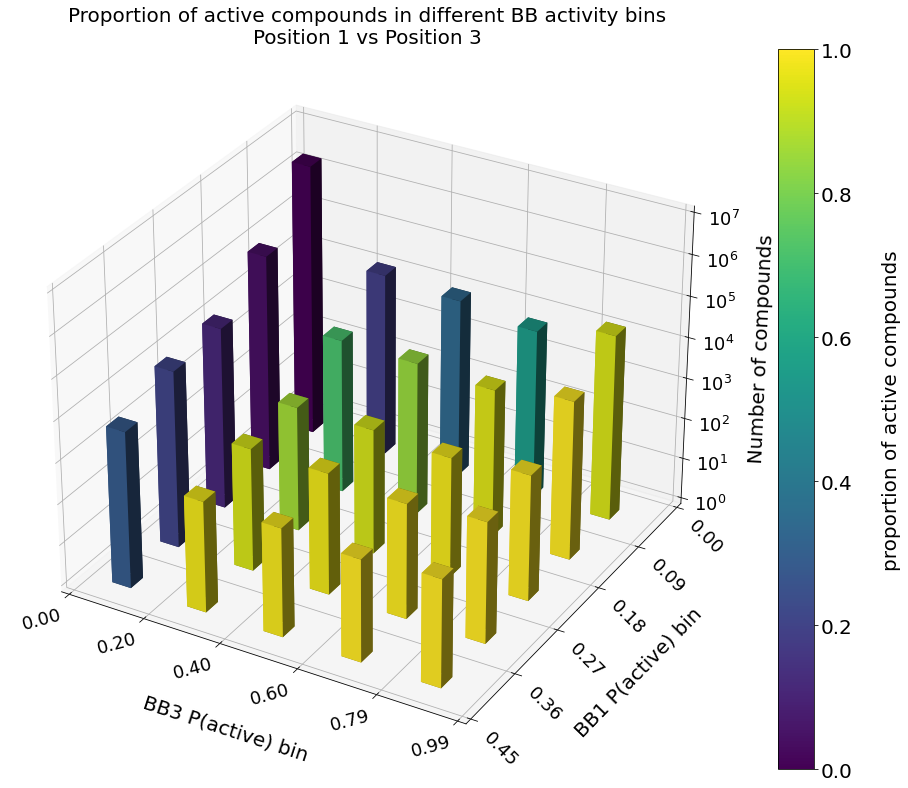

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,10))
# Adds 3D axes object to figure
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

color = plt.cm.viridis(total_sum_1_3['active_rate'])
#color.ax.tick_params(labelsize=10)
cp = ax.bar3d(xpos_1_3[::-1], ypos_1_3[::-1], zpos_1_3, dx_1_3, dy_1_3, dz_1_3, color=color)
ax.set_xticks(np.arange(0, 6))
#ax.set_xticks(np.arange(5, -1, -1))
ax.set_xticklabels([f'{x:.2f}' for x in bb3_bins], fontsize=18, rotation=15, ha='right')
ax.tick_params(axis='x', pad=0)

#ax.set_yticks(np.arange(0, 6))
ax.set_yticks(np.arange(5, -1, -1))
ax.set_yticklabels([f'{x:.2f}' for x in bb1_bins], fontsize=18, rotation=-45, ha='left')
ax.tick_params(axis='y', pad=0)

ax.set_zticks(np.arange(0, 8, 1))
ax.set_zticklabels([f'$10^{x}$' for x in np.arange(0,8,1)], fontsize=18)
ax.tick_params(axis='z', pad=10)

ax.set_xlabel('BB3 P(active) bin', fontsize=20, labelpad=30)
ax.set_ylabel('BB1 P(active) bin', fontsize=20, labelpad=35)
ax.set_zlabel('Number of compounds', fontsize=20, labelpad=25)
ax.set_title('Proportion of active compounds in different BB activity bins\nPosition 1 vs Position 3', fontsize=20)
cbar_1_3 = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax)
cbar_1_3.ax.tick_params(labelsize=20)
cbar_1_3.set_label('proportion of active compounds', fontsize=20, labelpad=30)
plt.savefig('figures/bb_1_3_3D.png', bbox_inches='tight')
plt.show()

In [30]:
total_sum_1_3.loc[total_sum_1_3['bb3_bin'] == 0]

,bb1_bin,bb3_bin,bb2_bin_inactive,bb2_bin_active,active_rate,log_counts
0,0,0,4453691,6598,0.001479,6.649363
5,1,0,194259,8197,0.040488,5.306331
10,2,0,24187,3015,0.110837,4.434601
15,3,0,16317,4194,0.204476,4.311987
20,4,0,4520,1831,0.288301,3.802842


#### Group by positions 2 and 3

In [31]:
# Calculate how many active and inactive compounds are in each 2D bin
inactive_sum_2_3 = total_complete.loc[total_complete['read_count'] == 0].groupby(['bb2_bin', 'bb3_bin'], as_index=False).count()
inactive_sum_2_3 = inactive_sum_2_3.rename(columns={'bb1_bin': 'bb1_bin_inactive'})
active_sum_2_3 = total_complete.loc[total_complete['read_count'] > 0].groupby(['bb2_bin', 'bb3_bin'], as_index=False).count()
active_sum_2_3 = active_sum_2_3.rename(columns={'bb1_bin': 'bb1_bin_active'})


In [32]:
# Calculate relative ratio of active and inactive compounds in each 2D bin
total_sum_2_3 = pd.merge(inactive_sum_2_3[['bb2_bin', 'bb3_bin', 'bb1_bin_inactive']], 
         active_sum_2_3[['bb2_bin', 'bb3_bin', 'bb1_bin_active']], 
         left_on=['bb2_bin', 'bb3_bin'], right_on=['bb2_bin', 'bb3_bin'])
total_sum_2_3['active_rate'] = np.nan_to_num(total_sum_2_3['bb1_bin_active']/(total_sum_2_3['bb1_bin_active'] + total_sum_2_3['bb1_bin_inactive']), 0)
total_sum_2_3['log_counts'] = np.nan_to_num(np.log10(total_sum_2_3['bb1_bin_active'] + total_sum_2_3['bb1_bin_inactive']))    

In [33]:
# Initialize parameters for plot
lx_2_3 = len(np.unique(total_sum_2_3['bb2_bin']))
ly_2_3 = len(np.unique(total_sum_2_3['bb3_bin']))
xpos_2_3 = np.arange(lx_2_3-1, -1, -1)
ypos_2_3 = np.arange(0, ly_2_3, 1)
xpos_2_3, ypos_2_3 = np.meshgrid(xpos_2_3 + 0.35, ypos_2_3 + 0.25)
xpos_2_3 = xpos_2_3.flatten()
ypos_2_3 = ypos_2_3.flatten()
zpos_2_3 = np.zeros(lx_2_3*ly_2_3)

dx_2_3 = 0.25*np.ones_like(zpos_2_3)
dy_2_3 = dx_2_3.copy()
dz_2_3 = total_sum_2_3.sort_values(by=['bb2_bin', 'bb3_bin'])['log_counts']

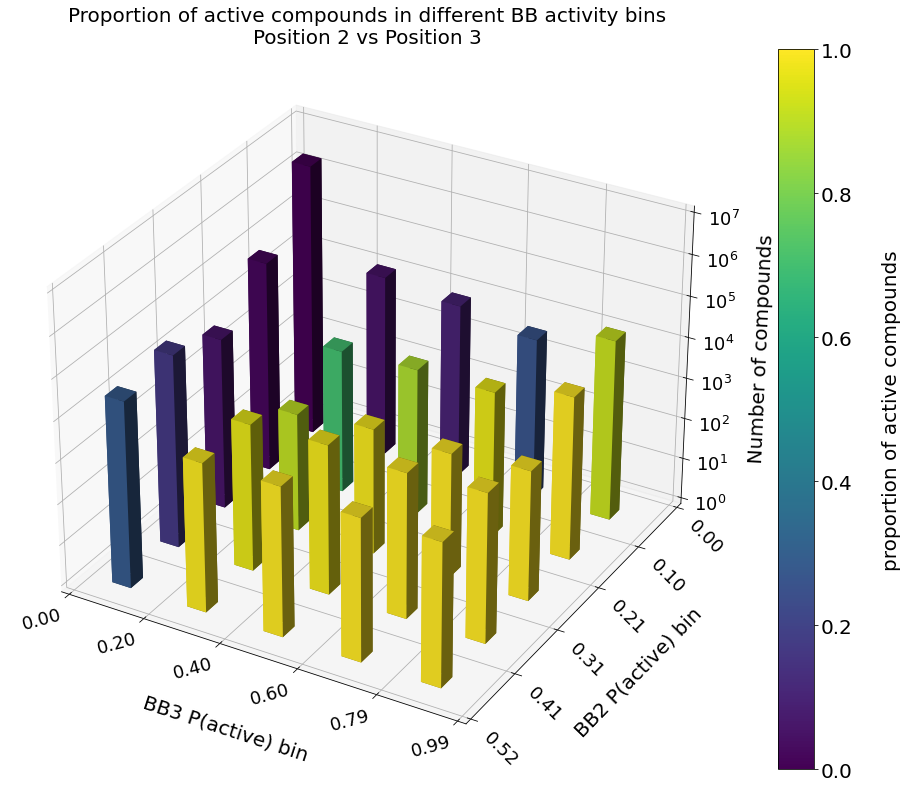

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,10))
# Adds 3D axes object to figure
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

color = plt.cm.viridis(total_sum_2_3['active_rate'])
#color.ax.tick_params(labelsize=10)
cp = ax.bar3d(xpos_2_3[::-1], ypos_2_3[::-1], zpos_2_3, dx_2_3, dy_2_3, dz_2_3, color=color)
#ax.set_xticks(np.arange(5, -1, -1))
ax.set_xticks(np.arange(0, 6))
ax.set_xticklabels([f'{x:.2f}' for x in bb3_bins], fontsize=18, rotation=15, ha='right')
ax.tick_params(axis='x', pad=0)

#ax.set_yticks(np.arange(0, 6))
ax.set_yticks(np.arange(5, -1, -1))
ax.set_yticklabels([f'{x:.2f}' for x in bb2_bins], fontsize=18, rotation=-45, ha='left')
ax.tick_params(axis='y', pad=0)

ax.set_zticks(np.arange(0, 8, 1))
ax.set_zticklabels([f'$10^{x}$' for x in np.arange(0,8,1)], fontsize=18)
ax.tick_params(axis='z', pad=10)

ax.set_xlabel('BB3 P(active) bin', fontsize=20, labelpad=30)
ax.set_ylabel('BB2 P(active) bin', fontsize=20, labelpad=35)
ax.set_zlabel('Number of compounds', fontsize=20, labelpad=25)
ax.set_title('Proportion of active compounds in different BB activity bins\nPosition 2 vs Position 3', fontsize=20)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('proportion of active compounds', fontsize=20, labelpad=30)
plt.savefig('figures/bb_2_3_3D.png', bbox_inches='tight')
plt.show()

In [35]:
total_sum_2_3.loc[total_sum_2_3['bb2_bin'] == 0]

,bb2_bin,bb3_bin,bb1_bin_inactive,bb1_bin_active,active_rate,log_counts
0,0,0,4478641,2482,0.000554,6.651387
1,0,1,25159,1452,0.054564,4.425061
2,0,2,15431,1613,0.094637,4.231572
3,0,3,6114,2159,0.260969,3.917663
4,0,4,2142,23814,0.917476,4.414238
